In [1]:
import pyorc
# import cartopy
import xarray as xr
# import cartopy.crs as ccrs
import pandas as pd
from matplotlib import patches
import matplotlib.pyplot as plt
# import cartopy.io.img_tiles as cimgt
# from matplotlib.colors import Normalize
# from dask.diagnostics import ProgressBar
import glob

In [8]:
months = ['January', 'February', 'March', 'April', 'May', 'June']
videos = []
for month in months:
    for video in sorted(glob.glob("*.mp4", root_dir=f"{month}/videos/")):
        videos.append(
            {
                'video': f'{month}/videos/{video}',
                'name': video.split('.')[0]
            }
        )
# videos

In [9]:
# current_file = videos.pop()
current_file = videos.pop(0)
video_file = current_file['video']
video_name = current_file['name']
video = pyorc.api.video.Video(video_file, start_frame=0, end_frame=125)
frame = video.get_frame(0, method="rgb")

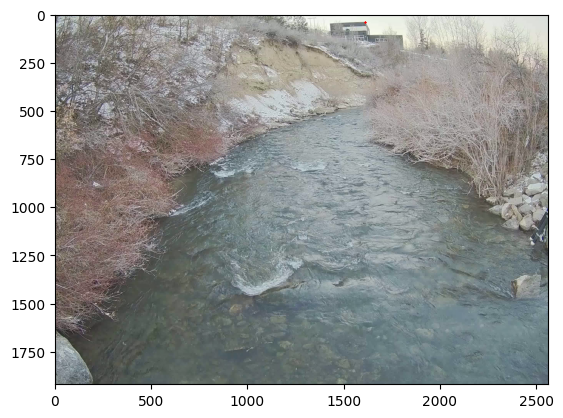

In [10]:
plt.plot(1613, 40, "rx", markersize=1)
plt.imshow(frame)

In [11]:
gcps = dict(
    src=[
        [2434, 1397], #Blue
        [2304, 1001], #Green
        [525, 879],   #Orange
        [77, 1779]    #Purple
    ]
)

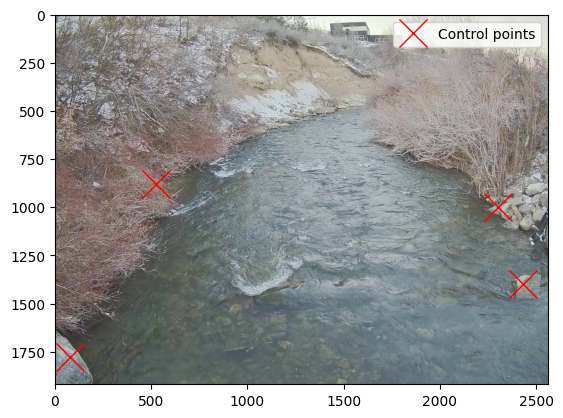

In [12]:
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.legend()
plt.savefig(f"Camera_test/Control/{video_name}_control.png", bbox_inches="tight", dpi=600)

In [13]:
gcps["dst"] = [
    [13.633,6.171],  # Blue
    [15.307,9.675],   # Green
    [3.412,15.957],  # Orage
    [5.747,4.855]    # Purple    
]

gcps["z_0"] = 0.00

In [14]:
height, width = frame.shape[0:2]

In [15]:
cam_config = pyorc.CameraConfig(height=height, width=width, gcps=gcps)

CAMERA MATRIX: [[1.7348688e+03 0.0000000e+00 1.2800000e+03]
 [0.0000000e+00 1.7348688e+03 9.6000000e+02]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
DIST COEFFS: [[0.0], [0.0], [0.0], [0.0], [0.0]]


In [16]:
corners = [
    [2559, 1919],
    [1752, 680],
    [940, 680],
    [200, 1919]
]
cam_config.set_bbox_from_corners(corners)
cam_config.resolution = 0.01
cam_config.window_size = 25

FileNotFoundError: [Errno 2] No such file or directory: '/home/waterlab/PIV_UWRL/Camera_test/Corners/video_capture_2024-01-01_07-51-43_corners.png'

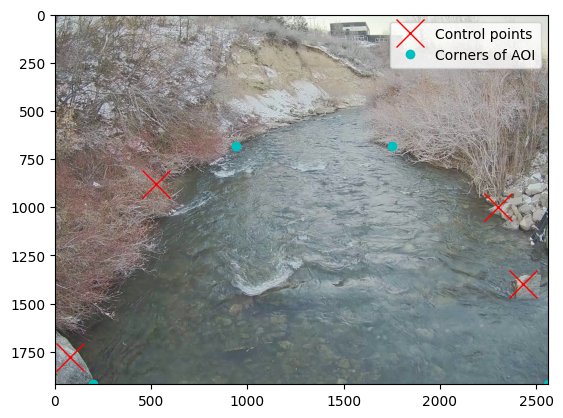

In [17]:
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.plot(*zip(*corners), "co", label="Corners of AOI")
plt.legend()
plt.savefig(f"Camera_test/Corners/{video_name}_corners.png", bbox_inches="tight", dpi=600)

In [ ]:
ax2 = plt.axes()
ax2.imshow(frame)
cam_config.plot(ax=ax2, camera=True)
plt.savefig(f"Camera_test/Cam_config/{video_name}_cam_config.png", bbox_inches="tight", dpi=600)

In [ ]:
# cam_config.to_file(f"Cam_config/{video_name}_cam-config-UWRL.json")

In [ ]:
# cam_config = pyorc.load_camera_config(f"Cam_config/{video_name}_cam-config-UWRL.json")
# cam_config = pyorc.load_camera_config("cam-config-UWRL.json")

In [ ]:
stabilize = [
    [2559, 1919],
    [1752, 680],
    [940, 680],
    [200, 1919]
]
video = pyorc.Video(
    video_file,
    camera_config=cam_config,
    start_frame=0,
    end_frame=125,
    stabilize=stabilize,
    h_a=0.
)
# video

In [ ]:
patch_kwargs = {
    "alpha": 0.5,
    "zorder": 2,
    "edgecolor": "w",
    "label": "Area of interest",
}
f, ax = plt.subplots(1, 1, figsize=(10, 6))

frame = video.get_frame(0, method="rgb")
# plot frame on a notebook-style window
ax.imshow(frame)
# add the polygon to the axes
patch = patches.Polygon(
    stabilize,
    **patch_kwargs
)
p = ax.add_patch(patch)

In [ ]:
plt.imshow(frame)

In [ ]:
da = video.get_frames()
da[0].frames.plot(cmap="gray", ax=ax)

In [ ]:
da_norm = da.frames.normalize()
da_norm[0].frames.plot(cmap="gray")

In [ ]:
da_norm_proj = da_norm.frames.project()
da_norm_proj[0].frames.plot(cmap="gray")

In [ ]:
# extract frames again, but now with rgb
da_rgb = video.get_frames(method="rgb")
# project the rgb frames, same as before
da_rgb_proj = da_rgb.frames.project()